In [9]:
import pandas as pd
import yfinance as yf
from datetime import datetime
from datetime import date,timedelta
import yfinance as yf
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
import seaborn as sns
import pandas_ta as ta
import numpy as np

In [10]:
today = date.today()

d1 = today.strftime('%Y-%m-%d')
end_date = d1
d2 = date.today() - timedelta(days=730)
d2 = d2.strftime('%Y-%m-%d')
start_date = d2

In [11]:
ticker = input('Write ticker: ')
stock_data = yf.download(ticker, start = start_date, end = end_date, progress=False)
stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-03,1.000056,1.000158,0.999984,1.000089,1.000089,40191505534
2022-10-04,1.000091,1.000256,1.000065,1.000251,1.000251,44505643606
2022-10-05,1.000250,1.000305,1.000052,1.000109,1.000109,41883470473
2022-10-06,1.000105,1.000224,1.000088,1.000143,1.000143,43958843047
2022-10-07,1.000127,1.000212,1.000058,1.000122,1.000122,38019451874
...,...,...,...,...,...,...
2024-09-27,1.000248,1.001816,0.999799,1.000179,1.000179,61923482857
2024-09-28,1.000224,1.001155,0.999895,1.000186,1.000186,38585123416
2024-09-29,1.000198,1.001930,0.999852,1.000140,1.000140,39151842030


In [12]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 730 entries, 2022-10-03 to 2024-10-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       730 non-null    float64
 1   High       730 non-null    float64
 2   Low        730 non-null    float64
 3   Close      730 non-null    float64
 4   Adj Close  730 non-null    float64
 5   Volume     730 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 39.9 KB


In [13]:
stock_data = stock_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]


In [14]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-03,1.000056,1.000158,0.999984,1.000089,1.000089,40191505534
2022-10-04,1.000091,1.000256,1.000065,1.000251,1.000251,44505643606
2022-10-05,1.000250,1.000305,1.000052,1.000109,1.000109,41883470473
2022-10-06,1.000105,1.000224,1.000088,1.000143,1.000143,43958843047
2022-10-07,1.000127,1.000212,1.000058,1.000122,1.000122,38019451874


In [15]:
fig = px.line(data_frame = stock_data, x=stock_data.index, y='Close', title= 'Stock market line plot')
fig.update_xaxes(
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()


In [16]:
figure = go.Figure(data=[go.Candlestick(x=stock_data.index, open=stock_data['Open'], high=stock_data['High'], low=stock_data['Low'], close=stock_data['Close'])])
title = 'CandleStick of stock market'
figure.update_xaxes(
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
figure.show()

In [17]:
#RSI, Garman, ATR, MACD
stock_data['RSI'] = ta.rsi(close = stock_data["Adj Close"], length=14)

stock_data['Garman'] = ((np.log(stock_data['High'])- np.log(stock_data['Low']))**2)/2-(2*np.log(2)-1)*((np.log(stock_data['Adj Close']) -np.log(stock_data['Open']))**2)

def compute_atr(stock_data):
    atr = ta.atr(high=stock_data['High'], low=stock_data['Low'], close=stock_data['Close'], length=14)
    return atr.sub(atr.mean()).div(atr.std())
stock_data['ATR'] = compute_atr(stock_data)

def compute_macd(stock_data):
    macd = ta.macd(close=stock_data['Close'], length = 14).iloc[:,0]
    return macd.sub(macd.mean()).div(macd.std())
stock_data['MACD'] = compute_macd(stock_data)

today = date.today() 
two_weeks = today - timedelta(days=14)

#Last 14 days
technical_analysis = stock_data.iloc[-14:]
technical_analysis



,Open,High,Low,Close,Adj Close,Volume,RSI,Garman,ATR,MACD
Date,,,,,,,,,,
2024-09-18,1.000096,1.001952,0.999734,1.000435,1.000435,62277811817,55.249613,2.411394e-06,1.148256,0.157636
2024-09-19,1.000096,1.001882,0.999713,1.000198,1.000198,68815065769,51.230417,2.344413e-06,1.161939,0.169425
2024-09-20,1.000211,1.001293,0.999657,1.000111,1.000111,62999225593,49.797860,1.333064e-06,1.117244,0.136851
2024-09-21,1.000055,1.001093,0.999879,1.000310,1.000310,33954200576,53.031619,7.111083e-07,1.030302,0.200878
2024-09-22,1.000355,1.001501,0.999777,1.000088,1.000088,41426101070,49.222235,1.456565e-06,1.004485,0.147064
2024-09-23,1.000112,1.001357,0.999659,0.999999,0.999999,60077721757,47.741588,1.435129e-06,0.977713,0.062445
2024-09-24,0.999966,1.001366,0.999654,0.999968,0.999968,56967919219,47.208937,1.464019e-06,0.954369,-0.018781
2024-09-25,0.999970,1.001298,0.999583,0.999855,0.999855,50797578929,45.227553,1.464111e-06,0.933006,-0.133988
2024-09-26,0.999754,1.001541,0.999553,1.000243,1.000243,66981158381,52.584906,1.881553e-06,0.942575,-0.045045


In [18]:
#MA
stock_data['M10'] = stock_data['Close'].rolling(window=10).mean()
stock_data['M20'] = stock_data['Close'].rolling(window=20).mean()

#Bolinger Bands
stock_data['SD'] = stock_data['Close'].rolling(window=20).std()
# Calculate the Upper Bollinger Band (UB) and Lower Bollinger Band (LB)
stock_data['UB'] = stock_data['M20'] + 2 * stock_data['SD']
stock_data['LB'] = stock_data['M20'] - 2 * stock_data['SD']


In [19]:
fig = go.Figure()

# Add the price chart (default)
fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['Close'], mode='lines', name='Price'))

# Add the RSI chart (initially hidden)
fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['RSI'], mode='lines', name='RSI', visible=False))

# Add the MACD chart (initially hidden)
fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['MACD'], mode='lines', name='MACD', visible=False))

# Add the Bollinger Bands chart (initially hidden)
fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['UB'], mode='lines', name='Upper Bollinger Band', visible=False, line=dict(color='red')))
fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['LB'], fill='tonexty', mode='lines', name='Lower Bollinger Band', visible=False, line=dict(color='green')))
fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['M20'], mode='lines', name='Middle Bollinger Band', visible=False, line=dict(color='blue')))
fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['Close'], mode='lines', name='Price (Bollinger)', visible=False, line=dict(color='black')))

# Define the buttons for dropdown menu
buttons = [
    dict(label='Price', method='update', args=[{'visible': [True, False, False, False, False, False, False]}, {'title': 'Stock market line plot in USD'}]),
    dict(label='RSI', method='update', args=[{'visible': [False, True, False, False, False, False, False]}, {'title': 'RSI Indicator'}]),
    dict(label='MACD', method='update', args=[{'visible': [False, False, True, False, False, False, False]}, {'title': 'MACD Indicator'}]),
    dict(label='Bollinger Bands', method='update', args=[{'visible': [False, False, False, True, True, True, True]}, {'title': 'Bollinger Bands'}])
]

# Create the dropdown menu
dropdown = go.layout.Updatemenu(
    buttons=buttons,
    direction='down',
    showactive=True,
    xanchor='left',
    yanchor='top',
    x=0.1,
    y=1.1
)

# Update layout to include dropdown menu and other customizations
fig.update_layout(
    updatemenus=[dropdown],
    plot_bgcolor='lightgray',   # Background color of the plotting area
    font=dict(family='Arial', size=12),
    title_font=dict(size=20),
    title_x=0.5,
    xaxis_title='Date',
    yaxis_title='Count',
    hoverlabel=dict(bgcolor='lightgrey', font_size=14),
    margin=dict(l=100, r=100, t=100, b=100),
    showlegend=True
)

# Show the figure
fig.show()


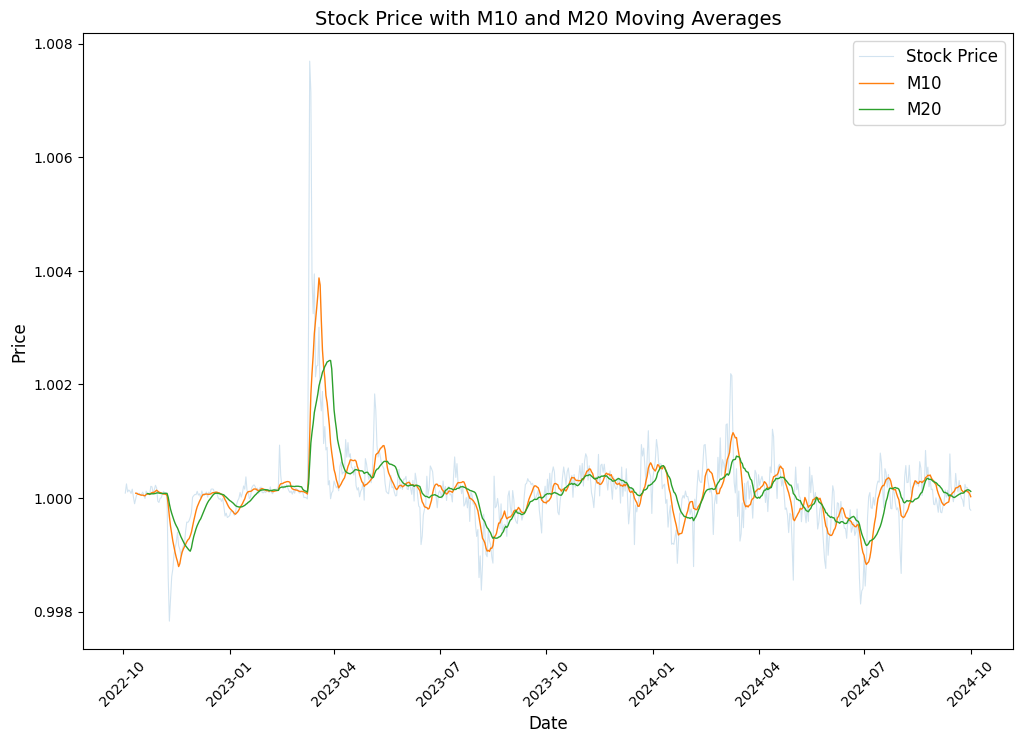

In [20]:
plt.figure(figsize=(12,8))
plt.plot(stock_data.index, stock_data['Close'], label='Stock Price', linewidth=0.8, alpha=0.2)

plt.plot(stock_data.index, stock_data['M10'], label='M10', linewidth=1, alpha=1)
plt.plot(stock_data.index, stock_data['M20'], label='M20', linewidth=1, alpha=1)

plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Stock Price with M10 and M20 Moving Averages', fontsize=14)
plt.legend(fontsize=12)
plt.xticks(rotation=45)
plt.show()

Machine Learning Models

In [21]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam

2024-10-02 14:28:49.407796: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [22]:
stock_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'RSI', 'Garman',
       'ATR', 'MACD', 'M10', 'M20', 'SD', 'UB', 'LB'],
      dtype='object')

In [23]:
X = stock_data[['Open', 'High', 'Low', 'Volume']].to_numpy()
y = stock_data['Close'].to_numpy()

scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [24]:
model = Sequential()

model.add(LSTM(128, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(LSTM(128, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()     

/opt/anaconda3/envs/DataScience/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 128)         │        68,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         3,225 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 202,931 (792.70 KB)

 Trainable params: 202,931 (792.70 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=1, epochs=30)

Epoch 1/30
584/584 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1033 - val_loss: 7.2171e-05
Epoch 2/30
584/584 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6523e-04 - val_loss: 0.0043
Epoch 3/30
584/584 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.4941e-04 - val_loss: 8.4859e-05
Epoch 4/30
584/584 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.8903e-04 - val_loss: 3.0983e-05
Epoch 5/30
584/584 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3608e-04 - val_loss: 3.1065e-05
Epoch 6/30
584/584 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6534e-04 - val_loss: 1.7402e-05
Epoch 7/30
584/584 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4759e-05 - val_loss: 7.3151e-06
Epoch 8/30
584/584 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5651e-05 - val_loss: 8.4952e-07
Epoch 9/30
584/584 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9496e-05 - val_loss: 3.0240e-06
Epoch 10/30
584/584 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7303e-05 - val_loss: 4.2286e-07
Epoch 11/30
584/584 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9457

<Axes: >

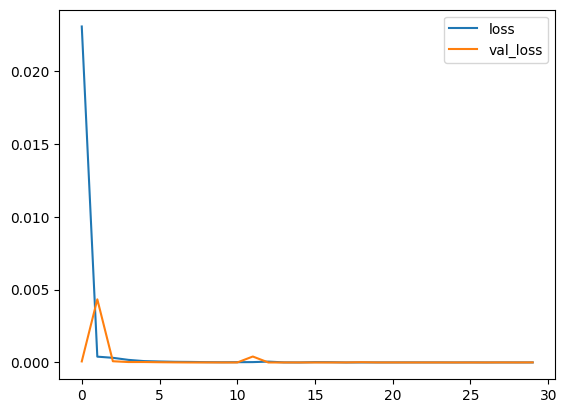

In [26]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [27]:
features = stock_data[['Open', 'High', 'Low', 'Volume']].iloc[-1].values.reshape(1, -1)
features_scaled = scaler.transform(features)
features_scaled = features_scaled.reshape((features_scaled.shape[0], 1, features_scaled.shape[1]))

# Making a prediction
prediction = model.predict(features_scaled)
print(prediction)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
[[0.9975833]]


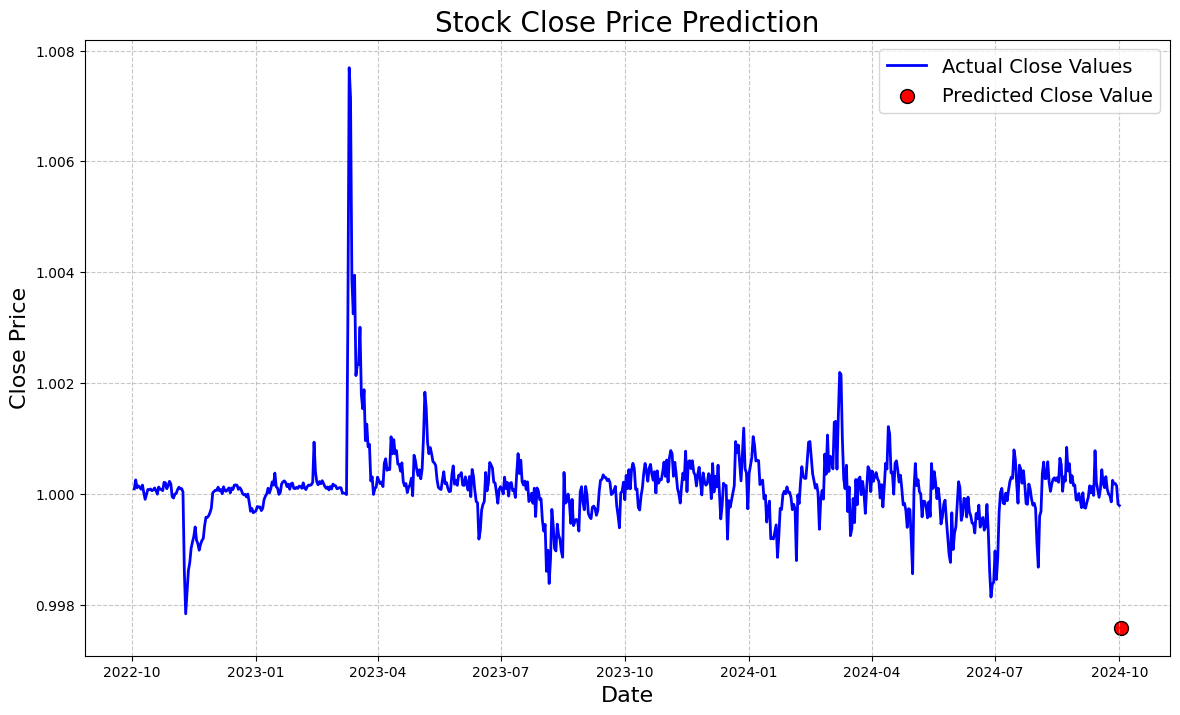

In [28]:
plt.figure(figsize=(14, 8))

# Plotting the actual close values
plt.plot(stock_data.index, stock_data['Close'], label='Actual Close Values', color='blue', linewidth=2)

# Plotting the predicted value
plt.scatter(stock_data.index[-1] + pd.DateOffset(1), prediction, color='red', label='Predicted Close Value', s=100, edgecolors='black')

# Adding grid lines for better visibility
plt.grid(True, linestyle='--', alpha=0.7)

# Adding titles and labels with larger font sizes
plt.title('Stock Close Price Prediction', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Close Price', fontsize=16)

# Adding a legend with a larger font size
plt.legend(fontsize=14)

# Display the plot
plt.show()

In [29]:
forecast_data = stock_data.reset_index().rename(columns={"Date": "ds", "Close": "y"})


In [30]:
model = Prophet()
model.fit(forecast_data)
forecasts = model.make_future_dataframe(periods=720)
predictions = model.predict(forecasts)
fig_forecast = plot_plotly(model, predictions)
fig_forecast.update_layout(title='Stock Price Forecast', xaxis_title='Date', yaxis_title='Price')
fig_forecast.show()


14:29:37 - cmdstanpy - INFO - Chain [1] start processing
14:29:37 - cmdstanpy - INFO - Chain [1] done processing


In [31]:
model = Prophet()
model.fit(forecast_data)

future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

predicted_prices = forecast[['ds', 'yhat']].tail(400)

print(predicted_prices)

14:29:38 - cmdstanpy - INFO - Chain [1] start processing
14:29:38 - cmdstanpy - INFO - Chain [1] done processing


            ds      yhat
360 2023-09-28  1.000044
361 2023-09-29  1.000168
362 2023-09-30  1.000234
363 2023-10-01  1.000175
364 2023-10-02  1.000128
..         ...       ...
755 2024-10-27  1.000351
756 2024-10-28  1.000301
757 2024-10-29  1.000290
758 2024-10-30  1.000281
759 2024-10-31  1.000260

[400 rows x 2 columns]


In [32]:
model = Prophet()
model.fit(forecast_data)

future = model.make_future_dataframe(periods=10)
forecast = model.predict(future)

predicted_prices = forecast[['ds', 'yhat']].tail(700)

trace1 = go.Scatter(x=forecast_data['ds'], y=forecast_data['y'], mode='lines+markers', name='Historical Data', marker=dict(color='blue'))

trace2 = go.Scatter(x=predicted_prices['ds'], y=predicted_prices['yhat'], mode='lines+markers', name='Predicted Prices', marker=dict(color='red'))

layout = go.Layout(
    title='Historical and Predicted Prices for BTC-USD',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Price'),
    legend=dict(x=0.7, y=1),
    hovermode='closest'
)

fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.show()

14:29:38 - cmdstanpy - INFO - Chain [1] start processing
14:29:38 - cmdstanpy - INFO - Chain [1] done processing
